In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import h5py

from matplotlib import animation
from matplotlib import cm
from mpl_toolkits import mplot3d
import os,sys

sys.path.append('/Users/ajc/Core/PreProcessing/PyScript')
import readdata as rd
import os
import seaborn as sns
import geopy.distance

In [2]:
sim = 'Wrun1E'
path = '/Users/ajc/FUSE/simulations/tests/ats-demos/13_reactive_transport/04_hyporheic_watershed/%s/'%sim

In [3]:
infile = [os.path.join(path,'visdump_surface_data.h5'), os.path.join(path,'visdump_surface_mesh.h5') ]

mesh = h5py.File(infile[1],'r')
mesh_data = list(mesh['0']['Mesh']['Nodes'])


-83.48060367992423 -83.39664444859618
35.02446722540252 35.08045573244733


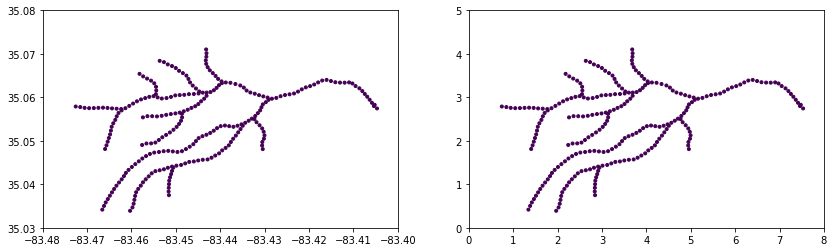

[0 1 2 3 4 5 6] 6.002079099775674
[-83.48, -83.4] [0 1 2 3 4 5 6]


In [42]:
X_mesh = []
Y_mesh = []
Z_mesh = []

for m in mesh_data:#[:30]:
    X_mesh.append(m[0])
    Y_mesh.append(m[1])
    Z_mesh.append(m[2])
def get_limits():
    fig = plt.figure(figsize=(14,4))
    ax = fig.add_subplot(121)

    ax.scatter(X_mesh,Y_mesh,marker=".",c=Z_mesh)
    #ax.set_xlim(xmin-0.0005,xmax)
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    print(xmin,xmax)
    print(ymin,ymax)
    X0 = [-83.48, -83.40]
    Y0 = [35.03, 35.08]
    ax.set_xlim(X0)
    ax.set_ylim(Y0)
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    xx = geopy.distance.geodesic(xmin,xmax).km + 0.07
    yy = geopy.distance.geodesic(ymin,ymax).km + 0.455
    Xlabels = np.round(np.linspace(0,xx,10,dtype=int),2)
    Ylabels = np.round(np.linspace(0,yy,7,dtype=int),2)

    ax = fig.add_subplot(122)
    ax.scatter(X_mesh,Y_mesh,marker=".",c=Z_mesh)
    ax.set_xticklabels(Xlabels)
    ax.set_yticklabels(Ylabels)
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    plt.show()
    print (Ylabels,yy)
    return X0, Y0, Xlabels, Ylabels
X0, Y0, Xlabels,Ylabels = get_limits()
print (X0,Ylabels)

In [18]:
implied_s = h5py.File('/Users/ajc/FUSE/simulations/tests/ats-demos/13_reactive_transport/04_hyporheic_watershed/coweeta_data/implied_source/coweeta-cellsource-100m.h5','r')
implied_s = h5py.File('/Users/ajc/FUSE/simulations/tests/ats-demos/13_reactive_transport/04_hyporheic_watershed/coweeta_data/implied_source/coweeta-impliedsource_watershed-100m.h5','r')

implied_src = np.concatenate(implied_s['surface-mass_src.cell.0']['0'])


discharge_s = h5py.File('/Users/ajc/FUSE/simulations/tests/ats-demos/13_reactive_transport/04_hyporheic_watershed/coweeta_data/discharge/coweeta-faceQ-100m.h5','r')
discharge = np.concatenate(discharge_s['surface-mass_flux.face.0']['0'])
discharge = [d for d in discharge if d >0]

cross_area = np.array([[0.8163220080526847,]*30, [0.36615236094580733,]*7, [0.4004007127485738,]*11, [0.3363141193639137,]*3,
             [0.03006694550743245,]*10,[0.1924396943885528,]*20, [0.12654463237568553,]*30, [0.03935396817517269,]*9,
             [0.07236637782749487,]*17,[0.06851824173774428,]*12, [0.035624209712113754,]*11, [0.33945737398362685,]*5,
             [0.24954923641757704,]*2,[0.09095085110858311,]*8, [0.04622924887712758,]*13, [0.20248899279870614,]*10,
             [0.1641051190892562,]*8,[0.020599246486715468,]*8, [0.07199534283806251,]*11, [0.0651169621600101,]*12,
             [0.024979953950850804,]*9,[0.06276187165492346,]*14])

cross_area = np.concatenate(cross_area)

Length = np.array([[25, 72.4138], [97.4138,]*28, [88.4286,]*7, [99.2727,]*11, [92.3333,]*3,
             [94.5,]*10,[98.5,]*20, [96.6667,]*30, [91.0,]*9,
             [97.3529,]*17,[97.3333,]*12, [95.0,]*11, [84.2,]*5,
             [82.5,]*2,[96.875,]*8, [99.3077,]*13, [98.7,]*10,
             [95.625,]*8,[98.375,]*8, [94.0909,]*11, [97.75,]*12,
             [96.7778,]*9,[97.2857,]*14])

Length = np.concatenate(Length)
Volume = np.array([r1*r2 for r1,r2 in zip(Length, cross_area)])
print (len(cross_area))

260


In [19]:
X_mesh, Y_mesh,Z_mesh = [],[], []

for m in mesh_data:
    
    X_mesh.append(m[0])
    Y_mesh.append(m[1])
    Z_mesh.append(m[2])

print (len(X_mesh), len(Y_mesh),len(Z_mesh))


260 260 260


In [20]:
outfile='/Users/ajc/Core/PostProcessing/ReactiveTransport/Hyporheic/Coweeta/June11/%s/'%sim
#os.mkdir(outfile)

260 260 260


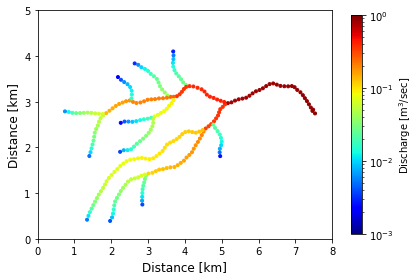

In [46]:
#Write solute concentration images to a directory
#%matplotlib qt

#fig = plt.figure()
#ax = fig.gca(projection='3d')

x_orig = X_mesh
y_orig = Y_mesh

centroid = []
thick = [1,1,1]
count = 0

#time = [np.round(t*360/3600,2) for t in range(cycles)]
cycles = 1
for k in range(cycles):
    fig, ax = plt.subplots(1,1,figsize=(6,4))
    y1 = y_orig
    y2 = [i + 0.000001 for i in y1]
    X = [x_orig,x_orig]
    Y = [y1,y2]
    
    z = np.ones(len(x_orig))*0

    Z = np.array([z,z])
    data = np.linspace(1,0,len(x_orig))
    Z_data = np.array([data,data])
    
    ran = [r for r in discharge]
    
    print (len(X_mesh),len(Y_mesh), len(ran))
    #sc = ax.scatter(X_mesh,Y_mesh,marker=".",c=ran,cmap=plt.get_cmap('jet'),vmin=1.0,vmax=np.max(ran),norm=matplotlib.colors.LogNorm())
    sc = ax.scatter(X_mesh,Y_mesh,marker=".",c=ran,cmap=plt.get_cmap('jet'),vmin=0.001,vmax=1,norm=matplotlib.colors.LogNorm())
    
    #plt.colorbar(sc, label=r'%s Concentration [$\mu$ M]'%var,shrink=.96)#,aspect=10)
    
    plt.colorbar(sc, label=r'Discharge [m$^3$/sec]',shrink=.96)#,aspect=10)
    
    ax.set_xlim(X0)
    ax.set_ylim(Y0)
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.set_xticklabels(Xlabels)
    ax.set_yticklabels(Ylabels)
    ax.set_xlabel('Distance [km]',fontsize=12, fontweight='normal')
    ax.set_ylabel('Distance [km]',fontsize=12, fontweight='normal')
    plt.tight_layout(h_pad=1)
    
    plt.savefig(outfile + '/fig-discharge.png',dpi=100)
    
    count +=1
    

In [ ]:
# Wrun1B : mass_flux = 0.1, mass_source = 0.0, reaction_rate = 0, vis_time = 480 sec

# Wrun1C : mass_flux = from_file, mass_source = 0.0, reaction_rate = 0, vis_time = 240 sec

# Wrun1D : mass_flux = from_file, mass_source = 0.1 (full domain), reaction_rate = 0, vis_time = 240 sec

# Wrun1E : mass_flux = from_file, mass_source = 0.1 (16_20,5_7), reaction_rate = 0, vis_time = 240 sec

# Wrun1F : mass_flux = from_file, mass_source = from file (full domain), reaction_rate = 0, vis_time = 480 sec, 

# Wrun1G : mass_flux = from_file, mass_source = from file (full domain), reaction_rate = 0, vis_time = 480 sec, mass_src = 0.001*mass_src

# Wrun1H : mass_flux = from_file, mass_source = from file (1st order), reaction_rate = 0, vis_time = 240 sec,

# Wrun1I : mass_flux = from_file, mass_source = from file (1st order), reaction_rate nonzero, vis_time = 240 sec,

# After fixing implied source (water source)
# Wrun1D : forest only, DOM = 1e-4, HALF_SATURATION_CONSTANT 3.0e-06
# Wrun1A : forest only, DOM = 1e-4, HALF_SATURATION_CONSTANT 1.0e-05
# Wrun1B : forest only, DOM = 1e-3, HALF_SATURATION_CONSTANT 1.0e-05
# Wrun1C : forest only, DOM = 5e-3, HALF_SATURATION_CONSTANT 1.0e-05

# Wrun1E : forest + farm, DOM = 1e-3, HALF_SATURATION_CONSTANT 5.0e-06
# Wrun1E_A : forest + farm, DOM = 1e-3, NO REACTION -> The tail should give us a number for dilution
# Wrun1E_B : forest + farm, DOM = 1e-3, NO REACTION, alpha = 1e-6 (denitrification_forest_farm-100mA_02.xml)
# Wrun1E_C : forest + farm, DOM = 1e-3, NO REACTION, alpha = 1e-6 (denitrification_forest_farm-100mA_03.xml)


#

#Wrun1E_S : forest + farm, DOM = 1e-3, HALF_SATURATION_CONSTANT 5.0e-06, subgrid vis
# Wrun1F : farm, DOM = 1e-3, HALF_SATURATION_CONSTANT 5.0e-06



In [ ]:
import re, os

def sorted_nicely( l ):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key = alphanum_key)

path_anim = os.path.join(outfile,var) + '/'
dir_files = os.listdir(path_anim)

Files = sorted_nicely(dir_files)
print (path_anim,outfile)
Files = [f for f in Files if f.endswith('.png')]
print (Files[:2])
import cv2
import numpy as np
#Files = Files[:60] + Files[450:520] #+ Files[37:70]
img_array = []
for filename in Files[::1]:
    #print (filename)
    filename = path_anim + filename
    #print (filename)
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
    


In [ ]:
out = cv2.VideoWriter(path_anim + 'RT-coweeta.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 5, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [48]:
#mean halflife 5 hours
Taus_0 = [1537.88,1049.99,867.80,832.14,841.39,875.87,930.08,1003.36,1097.76,1217.63,1370.10,1566.33,1824.00,2172.24,2661.90,3389.38,4559.96,6693.86,11566.29,31446.39]

Taus_1 = [2*t for t in Taus_0]
print (Taus_1)

[3075.76, 2099.98, 1735.6, 1664.28, 1682.78, 1751.74, 1860.16, 2006.72, 2195.52, 2435.26, 2740.2, 3132.66, 3648.0, 4344.48, 5323.8, 6778.76, 9119.92, 13387.72, 23132.58, 62892.78]
